In [24]:
# Import the necessary libraries (numpy, pandas, scikit-learn packages metrics and clustering)
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import metrics

In [26]:
# Import the Balance Scale dataset available at http://archive.ics.uci.edu/ml/datasets/balance+scale 
data = pd.read_csv("balance-scale.data") #in the folder folder as the python .ipynb 

In [28]:
#let's take a look at the dataset
data #this is the dataset

,B,1,1.1,1.2,1.3
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [30]:
data.values #dataset converted to 2D-array

array([['R', 1, 1, 1, 2],
       ['R', 1, 1, 1, 3],
       ['R', 1, 1, 1, 4],
       ...,
       ['L', 5, 5, 5, 3],
       ['L', 5, 5, 5, 4],
       ['B', 5, 5, 5, 5]], dtype=object)

In [32]:
# 3 This data set was generated to model psychological experimental results. 
# Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. 
# The attributes are the left weight, the left distance, the right weight, and the right distance. 
# The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight). 
# If they are equal, it is balanced. 
# Segment the outcome (first column) and remaining data (attributes) so we can use the attributes for clustering
X = data.values[:, 1:5] 
Y = data.values[:,0] #0 is for the index of the first column

In [34]:
print(X)
print("---------------------------------")
print(Y)

[[1 1 1 2]
 [1 1 1 3]
 [1 1 1 4]
 ...
 [5 5 5 3]
 [5 5 5 4]
 [5 5 5 5]]
---------------------------------
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'B' 'R' 'R'
 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'B' 'L' 'L' 'R' 'R'
 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'L' 'B'
 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R'
 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'B' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'B' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'B'
 'R' 'R' 'R' 'L' '

In [36]:
print(np.unique(Y))

['B' 'L' 'R']


In [38]:
# Scale the data that we are going to use for clustering
from sklearn.preprocessing import scale

In [40]:
# an example, not related to this dataset, but to better understand how scaling the dataset works
arr1=np.array([[1,55,120],[4,2,334],[2,20,300],[1,26,923],[3,43,876],[1,53,55]])
print(arr1, end="\n------------------------\n")
print("Before scaling, mean:",arr1.mean(axis=0))
print("Before scaling, std:",arr1.std(axis=0))

[[  1  55 120]
 [  4   2 334]
 [  2  20 300]
 [  1  26 923]
 [  3  43 876]
 [  1  53  55]]
------------------------
Before scaling, mean: [  2.          33.16666667 434.66666667]
Before scaling, std: [  1.15470054  18.98610603 342.70379176]


In [42]:
scaled_arr1 = scale(arr1)
print(scaled_arr1, end="\n------------------------\n")
print("After scaling, mean:",scaled_arr1.mean(axis=0))
print("After scaling, std:",scaled_arr1.std(axis=0))

[[-0.8660254   1.14996373 -0.91818846]
 [ 1.73205081 -1.64155128 -0.29374249]
 [ 0.         -0.69348958 -0.39295354]
 [-0.8660254  -0.37746901  1.4249429 ]
 [ 0.8660254   0.5179226   1.28779822]
 [-0.8660254   1.04462354 -1.10785663]]
------------------------
After scaling, mean: [ 0.00000000e+00  1.11022302e-16 -3.70074342e-17]
After scaling, std: [1. 1. 1.]


In [44]:
print("Before scaling, mean:",arr1.mean(axis=0))
print("After scaling, mean:",scaled_arr1.mean(axis=0))
print("Before scaling, std:",arr1.std(axis=0))
print("After scaling, std:",scaled_arr1.std(axis=0))

Before scaling, mean: [  2.          33.16666667 434.66666667]
After scaling, mean: [ 0.00000000e+00  1.11022302e-16 -3.70074342e-17]
Before scaling, std: [  1.15470054  18.98610603 342.70379176]
After scaling, std: [1. 1. 1.]


In [46]:
# now back to our dataset
# Scale the data that we are going to use for clustering
scaled_data = scale(X)
scaled_data

array([[-1.41761994, -1.41761994, -1.41761994, -0.70994407],
       [-1.41761994, -1.41761994, -1.41761994, -0.00226819],
       [-1.41761994, -1.41761994, -1.41761994,  0.70540768],
       ...,
       [ 1.41308356,  1.41308356,  1.41308356, -0.00226819],
       [ 1.41308356,  1.41308356,  1.41308356,  0.70540768],
       [ 1.41308356,  1.41308356,  1.41308356,  1.41308356]])

In [48]:
# data vs. scaled_data
X = np.array(X,dtype=np.float64)
print("scaled_data")
print("mean=",scaled_data.mean(axis=0))
print("std=",scaled_data.std(axis=0))
print("min=",scaled_data.min(axis=0))
print("max=",scaled_data.max(axis=0))
print("Not scaled_data")
print("mean=",X.mean(axis=0))
print("std=",X.std(axis=0))
print("min=",X.min(axis=0))
print("max=",X.max(axis=0))

scaled_data
mean= [ 9.10952225e-17 -6.83214169e-17 -5.69345141e-18 -2.52646906e-17]
std= [1. 1. 1. 1.]
min= [-1.41761994 -1.41761994 -1.41761994 -1.41761994]
max= [1.41308356 1.41308356 1.41308356 1.41308356]
Not scaled_data
mean= [3.00320513 3.00320513 3.00320513 3.00320513]
std= [1.41307629 1.41307629 1.41307629 1.41307629]
min= [1. 1. 1. 1.]
max= [5. 5. 5. 5.]


In [50]:
# We know that there are 3 possible categories for the data. 
# Create 3 data clusters using Agglomerative Hierarchical Clustering. 
# What are the silhouette score, homogeneity and completeness for these clusters? 
# (Helping hand, if you need to convert labels from strings to something else look at sklearn.preprocessing.LabelEncoder())

#from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
Y2 = LabelEncoder().fit_transform(Y)

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))

model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage="average", affinity="cosine")
model.fit(scaled_data)

#Silhouette refers to a method of interpretation and validation of consistency within clusters of data
print("silhouette_score = ", metrics.silhouette_score(scaled_data, model.labels_))

#all of the data points that we have of the same class are elements of the same cluster
print("completeness_score = ", metrics.completeness_score(Y2, model.labels_))
# all of the clusters contain only data points, which are members of a single class
print("homogeneity_score = ", metrics.homogeneity_score(Y2, model.labels_))

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [52]:
print(Y)
print(Y2)
print(model.labels_)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'B' 'R' 'R'
 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'B' 'L' 'L' 'R' 'R'
 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'L' 'B'
 'R' 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'B' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R'
 'R' 'R' 'B' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L'
 'L' 'B' 'R' 'R' 'L' 'B' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R'
 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'B' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'B'
 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'L' 'B'
 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R' 'L' 'B' 'R

NameError: name 'model' is not defined

In [54]:
# What are the impact of different distance and affinity measures on the silhouette score, homogeneity and 
# completeness for these clusters 
# (options available at http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)? 
# What is the best combination?

#from sklearn import cluster
#from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            print(a,l)
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_data)
            print("silhouette_score = ", metrics.silhouette_score(scaled_data, model.labels_))
            print("completeness_score = ", metrics.completeness_score(Y2, model.labels_))
            print("homogeneity_score = ", metrics.homogeneity_score(Y2, model.labels_))

euclidean ward


TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [56]:
# What are the impact of different distance and affinity measures on the silhouette score, homogeneity and 
# completeness for these clusters 
# (options available at http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)? 
# What is the best combination?

#from sklearn import cluster
#from sklearn.preprocessing import LabelEncoder

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"] 
result = []
for a in aff:
    for l in link:
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=n_digits, linkage=l, affinity=a)
            model.fit(scaled_data)
            result.append([a,l,metrics.silhouette_score(scaled_data, model.labels_),metrics.completeness_score(Y2, model.labels_),metrics.homogeneity_score(Y2, model.labels_)])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  print(result[i])
  if(result[i][2]>maxV):
    maxV = result[i][2]
    maxI = i
print("Max silhouette_score: ", result[maxI])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][3]>maxV):
    maxV = result[i][3]
    maxI = i
print("Max completeness_score: ", result[maxI])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][4]>maxV):
    maxV = result[i][4]
    maxI = i
print("Max homogeneity_score: ", result[maxI])

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [58]:
# What are the impact of different distance and affinity measures on the silhouette score, homogeneity and 
# completeness for these clusters 
# (options available at http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)? 
# What is the best combination?

#from sklearn import cluster
#from sklearn.preprocessing import LabelEncoder

n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
aff = ["euclidean", "l1", "l2", "manhattan", "cosine"]
link = ["ward", "complete", "average"]
result = []
for a in aff:
    for l in link:
      for i in range(2,10):
        if(l=="ward" and a!="euclidean"):
           continue
        else:
            model = cluster.AgglomerativeClustering(n_clusters=i, linkage=l, affinity=a)
            model.fit(scaled_data)
            result.append([a,l,i,metrics.silhouette_score(scaled_data, model.labels_),metrics.completeness_score(Y2, model.labels_),metrics.homogeneity_score(Y2, model.labels_)])
maxI = -1
maxV = 0
for i in range(0,len(result)):
  #print(result[i])
  if(result[i][3]>maxV):
    maxV = result[i][3]
    maxI = i
print("Max silhouette_score: ", result[maxI])

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

In [60]:
# What are the silhouette score, homogeneity and completeness for different numbers of clusters created using KMeans?
#from sklearn import cluster
#from sklearn.preprocessing import LabelEncoder
n_samples, n_features = scaled_data.shape
n_digits = len(np.unique(Y))
Y2 = LabelEncoder().fit_transform(Y)
for k in range(2, 5):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    print(k)
    print("silhouette_score = ", metrics.silhouette_score(scaled_data, kmeans.labels_))
    print("completeness_score = ", metrics.completeness_score(Y2, kmeans.labels_))
    print("homogeneity_score = ", metrics.homogeneity_score(Y2, kmeans.labels_))

2
silhouette_score =  0.18116503259926883
completeness_score =  0.08038704725069093
homogeneity_score =  0.061146122156766396
3
silhouette_score =  0.1744663216486939
completeness_score =  0.10837069818225858
homogeneity_score =  0.1294045181811919
4
silhouette_score =  0.19094694881223143
completeness_score =  0.10431759351112316
homogeneity_score =  0.15873055347711487


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


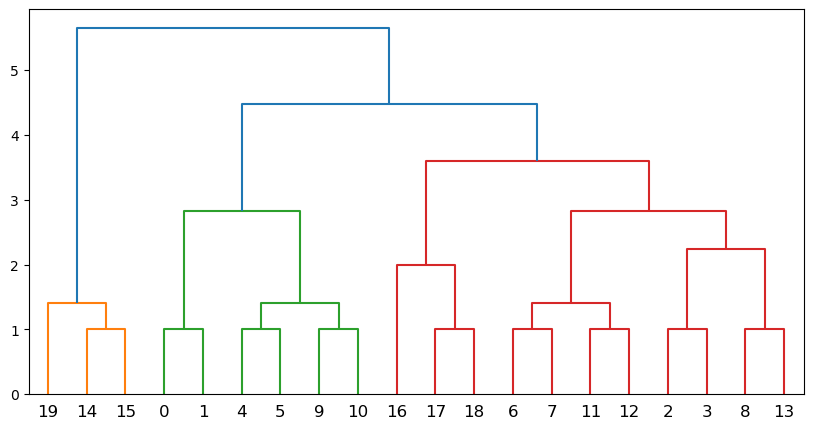

In [62]:
# dendrogram
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
Z = hierarchy.linkage(X[0:20], 'complete')
plt.figure(figsize=(10,5))
dn = hierarchy.dendrogram(Z)
plt.show()